In [20]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [28]:
def load_data(splits=['test']):
    test_files = []
    labels = []
    for split in splits:
        for dataset in ['suno', 'udio', 'lastfm']:
            with open(f'/home/laura/aimir/{dataset}/{split}.txt', 'r') as f:
                lines = f.read().splitlines()
                test_files += lines
                labels += [dataset] * len(lines)
    return test_files, labels

def create_confusion_matrix(y_true, y_pred):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # remove the last row
    cm_normalized = cm_normalized[:, :-1]

    return cm_normalized

def plot_confusion_matrices(matrices, titles):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # fig.suptitle('Normalized Confusion Matrices', fontsize=16, y=0.95)

    # Create a custom colormap
    colors = ['#f7fbff', '#08306b']  # light blue to dark blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=n_bins)

    # Find global min and max values for consistent color scaling
    vmin = min(cm.min() for cm in matrices)
    vmax = max(cm.max() for cm in matrices)

    for ax, cm, title in zip(axes.flat, matrices, titles):
        sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, ax=ax,
                    xticklabels=['lastfm', 'others'],
                    yticklabels=['lastfm', 'suno', 'udio'],
                    cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(title, fontsize=16)
        ax.set_ylabel('True Label', fontsize=14)
        ax.set_xlabel('Predicted Label', fontsize=14)

    # Add a single colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Normalized Confusion Matrix Values', rotation=270, labelpad=20)

    plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout to make room for colorbar
    # save as pdf
    plt.savefig('confusion_matrix.pdf')
    plt.show()
    plt.show()

Accuracy for clap-laion-music_dnn_predictions.npy: 0.980
Accuracy for clap-laion-music_rf_predictions.npy: 0.939
Accuracy for clap-laion-music_svc_predictions.npy: 0.977
Accuracy for musicnn_dnn_predictions.npy: 0.861
Accuracy for musicnn_rf_predictions.npy: 0.840
Accuracy for musicnn_svc_predictions.npy: 0.851


/tmp/ipykernel_745846/3040945501.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout to make room for colorbar


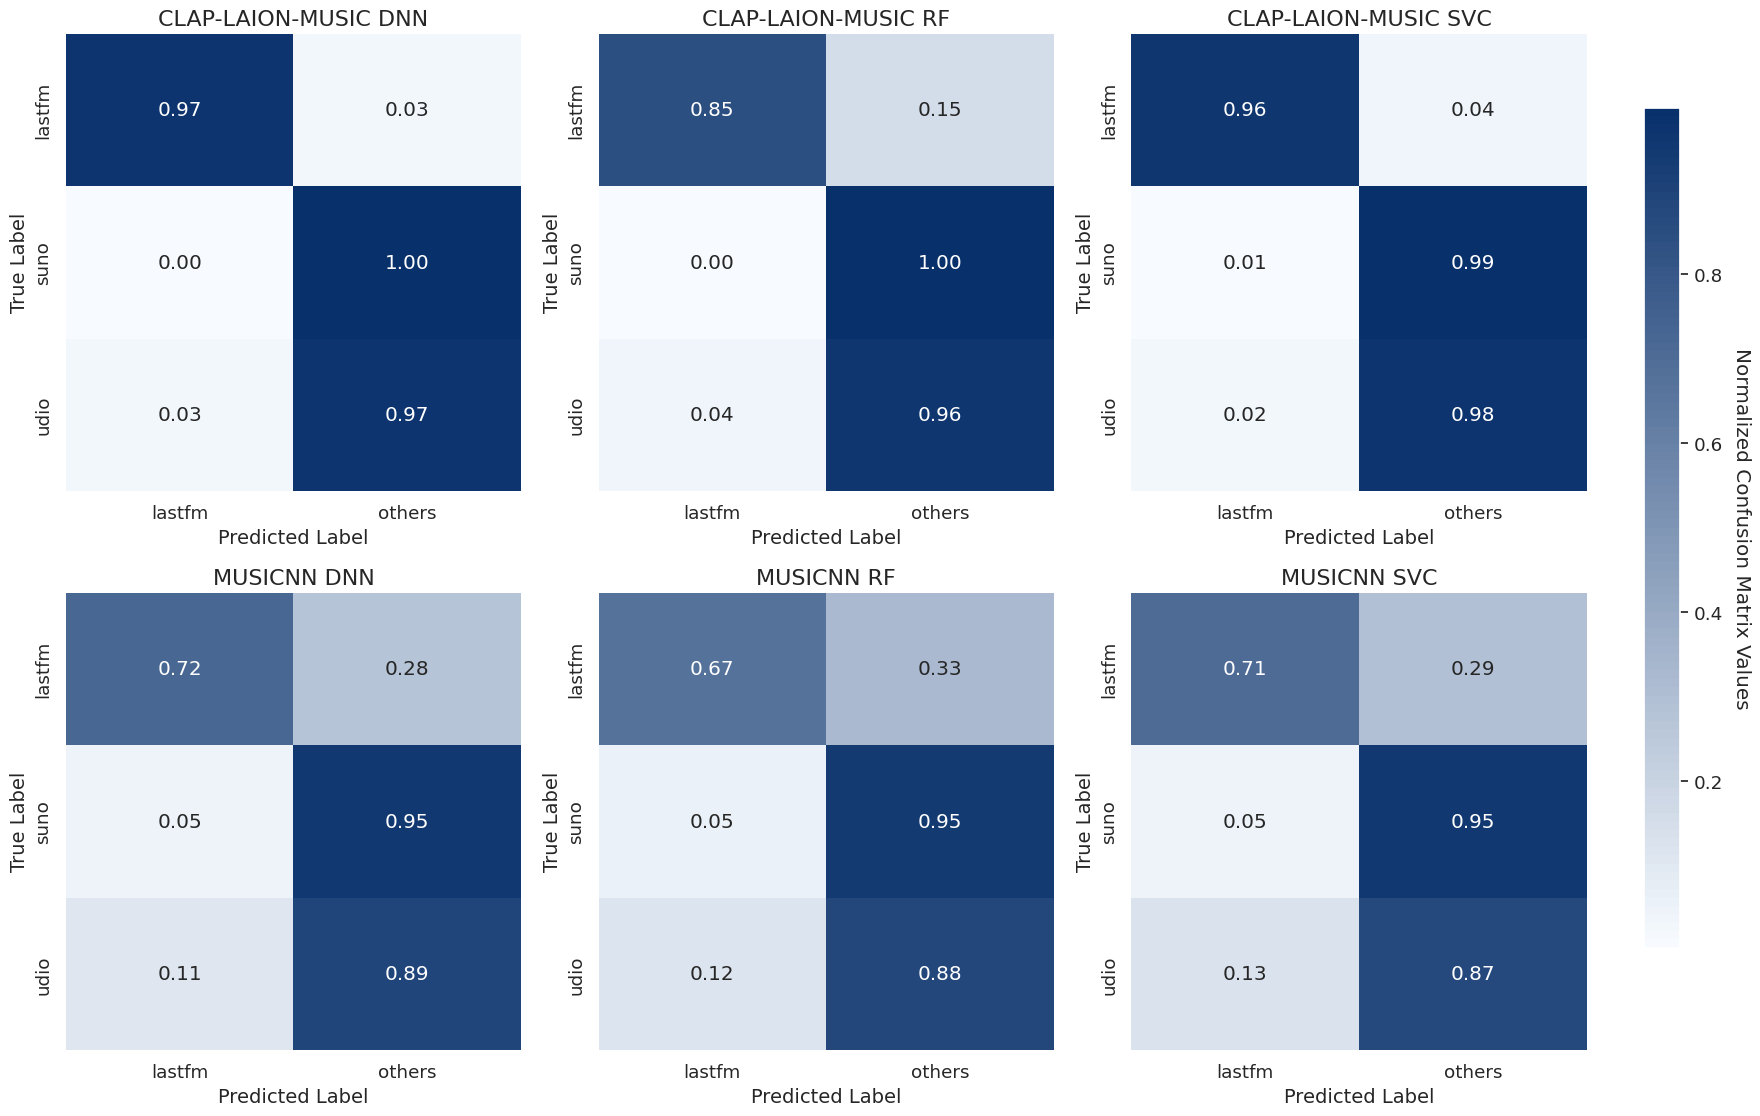

In [29]:
test_files, labels = load_data()
y_true = np.array([0 if label == 'lastfm' else 1 if label == 'suno' else 2 for label in labels])

matrices = []
titles = []

for file in sorted(os.listdir('/home/laura/aimir/predictions')):
    y_pred = np.load(f'/home/laura/aimir/predictions/{file}')

    if 'dnn' in file:
        y_pred = y_pred[:, 0]

    y_true_aux = [0 if label == 'lastfm' else 1 for label in labels]
    accuracy = np.mean(y_true_aux == y_pred)

    print(f'Accuracy for {file}: {accuracy:.3f}')

    cm = create_confusion_matrix(y_true, y_pred)
    matrices.append(cm)
    title = file.replace('_predictions.npy', '').replace('_', ' ').upper()
    titles.append(title)

plot_confusion_matrices(matrices, titles)